In [305]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [306]:
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [307]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [308]:
cdf = df.dropna()
# delete null value

In [309]:
cdf['Area'] = cdf['Area'].str.replace(',', '').astype(float)
cdf = cdf[cdf['Area'] < 350 ]  # Remove rows with unrealistic house sizes
cdf['Area'].round(2)

0        63.0
1        60.0
2        79.0
3        95.0
4       123.0
        ...  
3474     86.0
3475     83.0
3476     75.0
3477    105.0
3478     82.0
Name: Area, Length: 3402, dtype: float64

In [310]:
cdf['Parking'] = cdf['Parking'].astype(int)
cdf['Warehouse'] = cdf['Warehouse'].astype(int)
cdf['Elevator'] = cdf['Elevator'].astype(int)
cdf

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


In [311]:
# Correlation analysis
correlation_matrix = cdf.corr()
correlation_matrix

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.793324,0.266271,0.137016,0.219015,0.807132,0.807132
Room,0.793324,1.000000,0.274952,0.129691,0.220497,0.565638,0.565638
Parking,0.266271,0.274952,1.000000,0.431811,0.440636,0.225514,0.225514
Warehouse,0.137016,0.129691,0.431811,1.000000,0.198571,0.133268,0.133268
Elevator,0.219015,0.220497,0.440636,0.198571,1.000000,0.182581,0.182581
Price,0.807132,0.565638,0.225514,0.133268,0.182581,1.000000,1.000000
Price(USD),0.807132,0.565638,0.225514,0.133268,0.182581,1.000000,1.000000


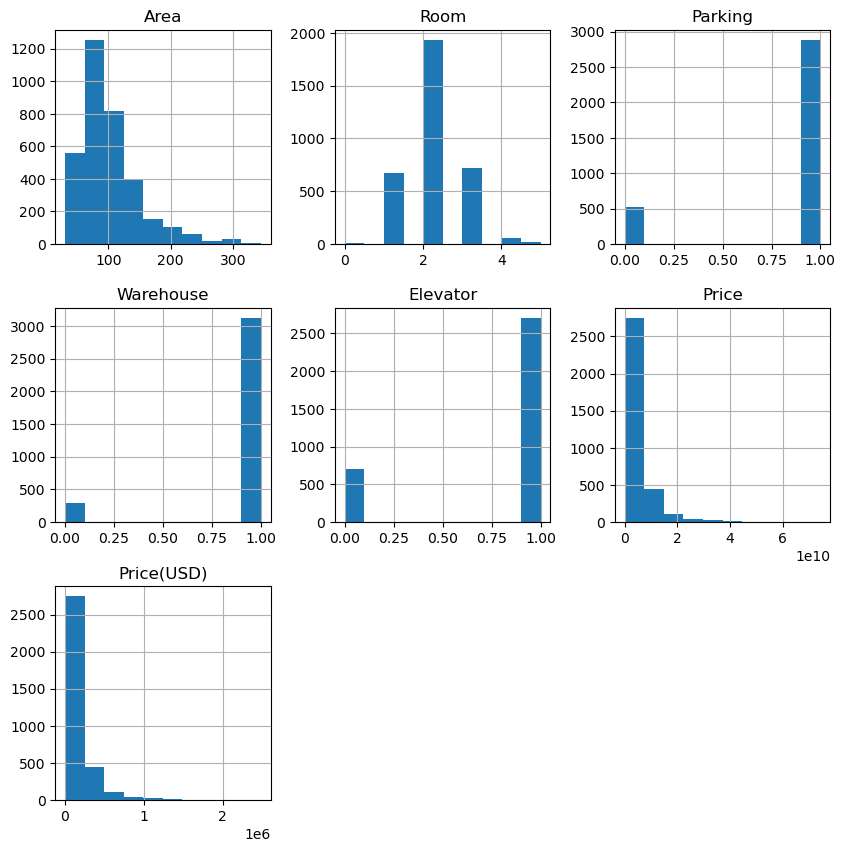

In [312]:
# Histogram analysis
cdf.hist(figsize=(10, 10))
plt.show()

<Axes: xlabel='Area', ylabel='Count'>

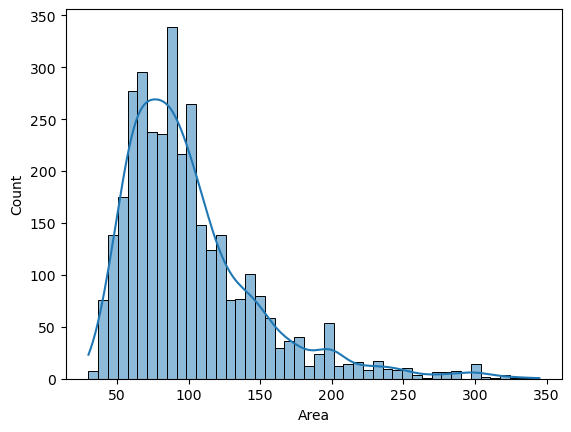

In [313]:
# Load dataset
# penguins = sns.load_dataset(".")
import seaborn as sns
# Plot histogram
sns.histplot(data = cdf, x = "Area", kde = True)

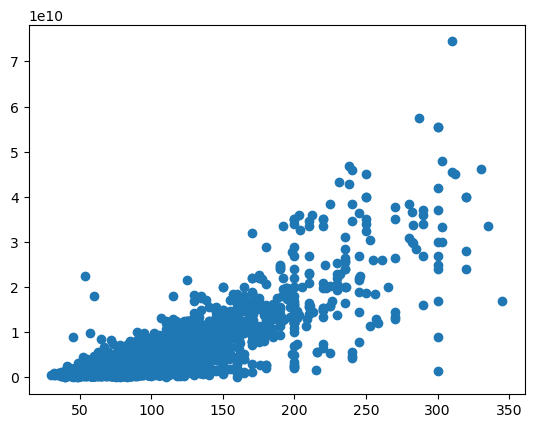

In [314]:
plt.scatter(cdf['Area'], cdf['Price'])
plt.show()

In [315]:
cdf.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [316]:
X = cdf[['Area','Room','Parking']]
y = cdf[["Price"]]

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=57)

In [318]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train , y_train)

LinearRegression()

In [319]:
print(clf.coef_)

print(clf.intercept_)

[[ 1.29818478e+08 -1.80423000e+09  4.56839926e+08]]
[-4.85996071e+09]


In [320]:
 prediction = clf.predict(x_test)

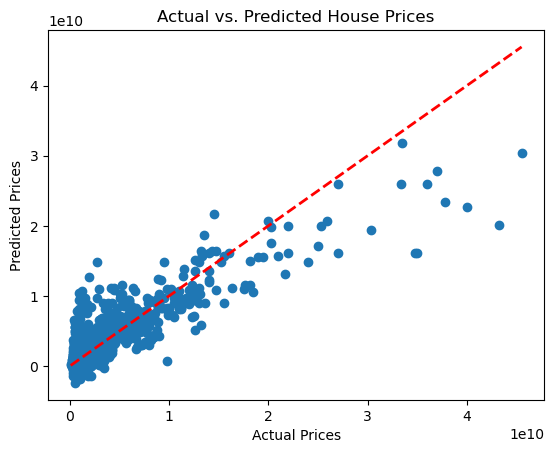

In [321]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")

# Add the regression line
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', lw=2)

plt.show()


In [322]:
print(y_test[0:5])
print(prediction[0:5])

             Price
1215  5.000000e+08
2953  5.500000e+08
1445  1.265000e+10
1496  1.020000e+09
2820  3.240000e+09
[[6.15186207e+09]
 [1.26796518e+09]
 [5.11331424e+09]
 [1.12491800e+09]
 [5.76240664e+09]]


In [323]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.097377571246491e+19
R-squared: 0.7119667601948532
